In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# first question
import matplotlib.pyplot as plt
from datetime import datetime

# second question
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-comments.csv
/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-posts.csv


## Calculate monthly average sentiment and chart these values

In [31]:
comments = pd.read_csv("/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-comments.csv")
posts = pd.read_csv("/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-posts.csv")

In [32]:
# after looking at the data, we should not drop na because some rows simply do not have those values
#comments = comments.dropna().reset_index(drop=True)
#posts = posts.dropna().reset_index(drop=True)

In [33]:
# take a look at data
comments

type       id subreddit.id subreddit.name  subreddit.nsfw  \
0        comment  imlddn9        2qh3l           news           False   
1        comment  imldbeh        2qn7b           ohio           False   
2        comment  imldado        2qhma     newzealand           False   
3        comment  imld6cb        2qi09     sacramento           False   
4        comment  imld0kj        2qh1i      askreddit           False   
...          ...      ...          ...            ...             ...   
4600693  comment  c0i1pd9        2cneq       politics           False   
4600694  comment  c0i1hsb        2qh1i      askreddit           False   
4600695  comment  c0i1a0w        2qh1n    environment           False   
4600696  comment  c0i195b        2qh13      worldnews           False   
4600697  comment  c0i14fb        2qh1i      askreddit           False   

         created_utc                                          permalink  \
0         1661990368  https://old.reddit.com/r/news/comments/x2cszk/...   
1         1661990340  https://old.reddit.com/r/Ohio/comments/x2awnp/...   
2         1661990327  https://old.reddit.com/r/newzealand/comments/x...   
3         1661990278  https://old.reddit.com/r/Sacramento/comments/x...   
4         1661990206  https://old.reddit.com/r/AskReddit/comments/x2...   
...              ...                                                ...   
4600693   1262349456  https://old.reddit.com/r/politics/comments/akc...   
4600694   1262329541  https://old.reddit.com/r/AskReddit/comments/ak...   
4600695   1262314480  https://old.reddit.com/r/environment/comments/...   
4600696   1262313018  https://old.reddit.com/r/worldnews/comments/ak...   
4600697   1262306047  https://old.reddit.com/r/AskReddit/comments/ak...   

                                                      body  sentiment  score  
0        Yeah but what the above commenter is saying is...     0.5719      2  
1        Any comparison of efficiency between solar and...    -0.9877      2  
2        I'm honestly waiting for climate change and th...    -0.1143      1  
3        Not just Sacramento. It's actually happening a...     0.0000      4  
4        I think climate change tends to get some peopl...     0.6634      1  
...                                                    ...        ...    ...  
4600693  &gt; We have no history - ours goes back only ...    -0.9849     32  
4600694  Changing the oil *filter* every single time yo...     0.7579      3  
4600695  A man who though a moderate Tory , has a mixed...     0.0242      1  
4600696  Both Iggy and Harper would have marched us int...     0.4754      0  
4600697  should be "San Diego Weatherman has an opinion...     0.7998      1  

[4600698 rows x 10 columns]

In [34]:
posts

type      id subreddit.id       subreddit.name  subreddit.nsfw  \
0       post  x2smmw        2vh0v  democraticsocialism           False   
1       post  x2slxy        2w844    nostupidquestions           False   
2       post  x2slk5       6wzx9b           eduwriters           False   
3       post  x2sbz6       46adh7  alternatitvereality           False   
4       post  x2sa2a        2qh1i            askreddit           False   
...      ...     ...          ...                  ...             ...   
620903  post   aki85        2qh1n          environment           False   
620904  post   akgtp        2qk5q      climateskeptics           False   
620905  post   akgkb        2qk5q      climateskeptics           False   
620906  post   akgbz        2qk5q      climateskeptics           False   
620907  post   ake6l        2qh1i            askreddit           False   

        created_utc                                          permalink  \
0        1661990237  https://old.reddit.com/r/DemocraticSocialism/c...   
1        1661990182  https://old.reddit.com/r/NoStupidQuestions/com...   
2        1661990150  https://old.reddit.com/r/EduWriters/comments/x...   
3        1661989389  https://old.reddit.com/r/AlternatitveReality/c...   
4        1661989240  https://old.reddit.com/r/AskReddit/comments/x2...   
...             ...                                                ...   
620903   1262350233  https://old.reddit.com/r/environment/comments/...   
620904   1262333495  https://old.reddit.com/r/climateskeptics/comme...   
620905   1262330777  https://old.reddit.com/r/climateskeptics/comme...   
620906   1262328753  https://old.reddit.com/r/climateskeptics/comme...   
620907   1262304750  https://old.reddit.com/r/AskReddit/comments/ak...   

                         domain  \
0                   twitter.com   
1        self.nostupidquestions   
2                eduwriters.pro   
3                   i.imgur.com   
4                self.askreddit   
...                         ...   
620903  seminal.firedoglake.com   
620904             examiner.com   
620905             ritholtz.com   
620906      wattsupwiththat.com   
620907                 kusi.com   

                                                      url  \
0       https://twitter.com/SusanofTexas/status/156480...   
1                                                     NaN   
2       https://eduwriters.pro/?cid=2860/?utm_source=r...   
3                         https://i.imgur.com/wJbchkQ.jpg   
4                                                     NaN   
...                                                   ...   
620903         http://seminal.firedoglake.com/diary/21707   
620904  http://www.examiner.com/x-25061-Climate-Change...   
620905  http://www.ritholtz.com/blog/2009/12/statistic...   
620906  http://wattsupwiththat.com/2009/12/31/ultimate...   
620907  http://www.kusi.com/home/78477082.html?video=p...   

                                                 selftext  \
0                                                     NaN   
1       Ok so I was having a conversation with my neig...   
2                                                     NaN   
3                                                     NaN   
4                                               [deleted]   
...                                                   ...   
620903                                                NaN   
620904                                                NaN   
620905                                                NaN   
620906                                                NaN   
620907                                                NaN   

                                                    title  score  
0       “Cities without water” is our future. The lead...     15  
1                               Sharks and climate change      2  
2                     How to start a climate change essay      1  
3       Ever notice that when it’s hot a few days in J...      1  
4       

In [35]:
# 'created_utc' is the timestamp for when the comments were created, convert it to time, then extract month
comments['time'] = comments['created_utc'].apply(lambda x: datetime.fromtimestamp(x))
comments['month'] = comments['time'].apply(lambda x: x.month)

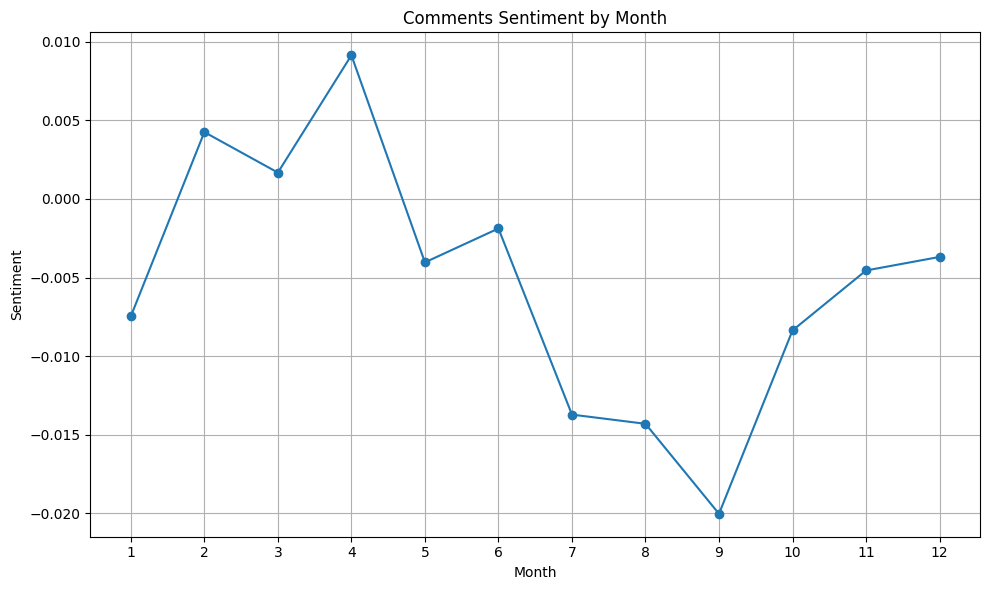

In [36]:
# find monthly average sentiment, then plot it
comments_sentiment_month_mean = comments.groupby(['month'])['sentiment'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(comments_sentiment_month_mean['month'], comments_sentiment_month_mean['sentiment'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sentiment')
plt.title('Comments Sentiment by Month')
plt.grid(True)
plt.xticks(comments_sentiment_month_mean['month']) 
plt.tight_layout()
plt.show()

## Generate topic clusters from the post and comment text data

### 0. Subset Data

In [37]:
comments['subreddit.name'] = comments['subreddit.name'].astype("string")
newzealand = comments[comments['subreddit.name'] == 'newzealand'].reset_index(drop=True)
newzealand_subset = newzealand[:1000]
newzealand_subset

type       id subreddit.id subreddit.name  subreddit.nsfw  \
0    comment  imldado        2qhma     newzealand           False   
1    comment  iml4s4w        2qhma     newzealand           False   
2    comment  iml40d9        2qhma     newzealand           False   
3    comment  imkqziz        2qhma     newzealand           False   
4    comment  imko2e7        2qhma     newzealand           False   
..       ...      ...          ...            ...             ...   
995  comment  ibnwphv        2qhma     newzealand           False   
996  comment  ibnkdxd        2qhma     newzealand           False   
997  comment  ibnkadz        2qhma     newzealand           False   
998  comment  ibnjbns        2qhma     newzealand           False   
999  comment  ibnaoj7        2qhma     newzealand           False   

     created_utc                                          permalink  \
0     1661990327  https://old.reddit.com/r/newzealand/comments/x...   
1     1661986574  https://old.reddit.com/r/newzealand/comments/x...   
2     1661986242  https://old.reddit.com/r/newzealand/comments/x...   
3     1661980892  https://old.reddit.com/r/newzealand/comments/x...   
4     1661979774  https://old.reddit.com/r/newzealand/comments/x...   
..           ...                                                ...   
995   1654727302  https://old.reddit.com/r/newzealand/comments/v...   
996   1654721607  https://old.reddit.com/r/newzealand/comments/v...   
997   1654721564  https://old.reddit.com/r/newzealand/comments/v...   
998   1654721149  https://old.reddit.com/r/newzealand/comments/v...   
999   1654717454  https://old.reddit.com/r/newzealand/comments/v...   

                                                  body  sentiment  score  \
0    I'm honestly waiting for climate change and th...    -0.1143      1   
1    Funny you say that, I read it as the reverse. ...    -0.5041      1   
2    She's not helping climate change is she, disgu...    -0.6472    -54   
3    Climate change has been known about for DECADE...     0.8834      8   
4    To get a mortgage you have to buy insurance so...    -0.5844      1   
..                                                 ...        ...    ...   
995  Actually it’s thinking of both the NZ economy,...     0.0000      1   
996  "Greatest threat to humans"? Go on, show me on...    -0.9542     -2   
997  They didn't propose a price at all, as far as ...     0.2263      4   
998  Do you think if it was 100% of what it would b...     0.5574     -2   
999  You seem to be saying that NZ farmers should f...    -0.7724      0   

                   time  month  
0   2022-08-31 23:58:47      8  
1   2022-08-31 22:56:14      8  
2   2022-08-31 22:50:42      8  
3   2022-08-31 21:21:32      8  
4   2022-08-31 21:02:54      8  
..                  ...    ...  
995 2022-06-08 22:28:22      6  
996 2022-06-08 20:53:27      6  
997 2022-06-08 20:52:44      6  
998 2022-06-08 20:45:49      6  
999 2022-06-08 19:44:14      6  

[1000 rows x 12 columns]

### 1. Remove Stop Words

In [38]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
nlp.Defaults.stop_words -= {"no", "not"}
newzealand_subset['cleaned_text'] = newzealand_subset.body.apply(lambda text: 
                                          " ".join(token.lemma_.strip().lower() for token in nlp(text) 
                                                   if not token.is_stop and not token.like_url and not token.is_punct))

/tmp/ipykernel_32/933440433.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
newzealand_subset.head()

type       id subreddit.id subreddit.name  subreddit.nsfw  created_utc  \
0  comment  imldado        2qhma     newzealand           False   1661990327   
1  comment  iml4s4w        2qhma     newzealand           False   1661986574   
2  comment  iml40d9        2qhma     newzealand           False   1661986242   
3  comment  imkqziz        2qhma     newzealand           False   1661980892   
4  comment  imko2e7        2qhma     newzealand           False   1661979774   

                                           permalink  \
0  https://old.reddit.com/r/newzealand/comments/x...   
1  https://old.reddit.com/r/newzealand/comments/x...   
2  https://old.reddit.com/r/newzealand/comments/x...   
3  https://old.reddit.com/r/newzealand/comments/x...   
4  https://old.reddit.com/r/newzealand/comments/x...   

                                                body  sentiment  score  \
0  I'm honestly waiting for climate change and th...    -0.1143      1   
1  Funny you say that, I read it as the reverse. ...    -0.5041      1   
2  She's not helping climate change is she, disgu...    -0.6472    -54   
3  Climate change has been known about for DECADE...     0.8834      8   
4  To get a mortgage you have to buy insurance so...    -0.5844      1   

                 time  month  \
0 2022-08-31 23:58:47      8   
1 2022-08-31 22:56:14      8   
2 2022-08-31 22:50:42      8   
3 2022-08-31 21:21:32      8   
4 2022-08-31 21:02:54      8   

                                        cleaned_text  
0  honestly wait climate change impact kick fucki...  
1  funny read reverse social right economic left ...  
2                 not help climate change disgusting  
3  climate change know decades boomer coastal hom...  
4  mortgage buy insurance damage home cover  long...

### 2. Get Entities

In [40]:
def extract_entities(text):
    newzealand_subset = nlp(text)
    return [ent.text for ent in newzealand_subset.ents]

In [41]:
entities_per_comment = [extract_entities(text) for text in newzealand_subset['cleaned_text'] if extract_entities(text) != []]
entities_per_comment[:10]

[['decades', 'house'],
 ['bush', '50 year'],
 ['5 year'],
 ['msn messenger', 'alta vista', 'late 90', 'early 2ks day'],
 ['one', 'one', 'one', 'one'],
 ['second', 'half'],
 ['3 year',
  'new zealand',
  '30',
  '100 year',
  'today',
  'year',
  'bernie grassroot',
  'new zealand'],
 ['4'],
 ['american', 'decade', 'new zealand'],
 ['100 year ago', '150', '200 year']]

### 3. N-Grams

In [42]:
def generate_bigrams(text):
    doc = nlp(text)
    return [token.text + ' ' + doc[i+1].text for i, token in enumerate(doc) if i < len(doc) - 1]

def generate_trigrams(text):
    doc = nlp(text)
    return [token.text + ' ' + doc[i+1].text + ' ' + doc[i+2].text for i, token in enumerate(doc) if i < len(doc) - 2]

In [43]:
bigrams = newzealand_subset['cleaned_text'].apply(generate_bigrams)
trigrams = newzealand_subset['cleaned_text'].apply(generate_trigrams)

In [44]:
bigrams_list = bigrams.tolist()
bigrams_list[0]

['honestly wait',
 'wait climate',
 'climate change',
 'change impact',
 'impact kick',
 'kick fucking',
 'fucking sense',
 'sense people',
 'people kid',
 'kid ll',
 'll poor',
 'poor suffering',
 'suffering rich',
 'rich claim',
 'claim victim',
 'victim hood',
 'hood handout',
 'handout let',
 'let starve',
 'starve honestly',
 'honestly hard',
 'hard day',
 'day not',
 'not truly',
 'truly wonder',
 'wonder actually']

In [45]:
trigrams_list = trigrams.tolist()
trigrams_list[0]

['honestly wait climate',
 'wait climate change',
 'climate change impact',
 'change impact kick',
 'impact kick fucking',
 'kick fucking sense',
 'fucking sense people',
 'sense people kid',
 'people kid ll',
 'kid ll poor',
 'll poor suffering',
 'poor suffering rich',
 'suffering rich claim',
 'rich claim victim',
 'claim victim hood',
 'victim hood handout',
 'hood handout let',
 'handout let starve',
 'let starve honestly',
 'starve honestly hard',
 'honestly hard day',
 'hard day not',
 'day not truly',
 'not truly wonder',
 'truly wonder actually']

## Visualize the data through a comparison temporal chart or other means. Were the sentiment values more diverse or extreme in the subpopulation?

In [46]:
potential_topics = entities_per_comment + bigrams_list + trigrams_list
flattened_list = [item for sublist in potential_topics for item in sublist]
flattened_list[:50]

['decades',
 'house',
 'bush',
 '50 year',
 '5 year',
 'msn messenger',
 'alta vista',
 'late 90',
 'early 2ks day',
 'one',
 'one',
 'one',
 'one',
 'second',
 'half',
 '3 year',
 'new zealand',
 '30',
 '100 year',
 'today',
 'year',
 'bernie grassroot',
 'new zealand',
 '4',
 'american',
 'decade',
 'new zealand',
 '100 year ago',
 '150',
 '200 year',
 '3',
 '5 year',
 'west coast',
 'couple year',
 '1:-',
 '2:-',
 '3:-',
 '80',
 '30 + year',
 'decade ago',
 'japanese',
 '20 30 year',
 'consequence national get power election',
 'day',
 'gt;fat',
 'new zealand',
 'nettle',
 'new zealand',
 'new zealand',
 'summer month']

#### Plot using PCA 

In [47]:
# 1. vectorize the data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(flattened_list)

# 2. reduce dimensions using PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# 3. cluster the data using KMeans
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

# create a dataframe for visualization
df = pd.DataFrame(X_pca, columns=['x', 'y'])
df['label'] = labels
df['text'] = flattened_list

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [51]:
fig = px.scatter(df, x='x', y='y', color='label', text='text', title="Clustered Topics Visualization")
fig.show()

#### Filter Data

Taking a closer look into the clusters, the topics between 0.1 and -0.1 on the y-axis and those before 0.3 on the x-axis are not coherent topics/are noisy data, so we would remove those from the graph. 

In [49]:
filtered_df = df[(df['y'] > 0.1) | (df['y'] < -0.1) | (df['x'] > 0.3)]

# create scatter plot with the filtered data
fig = px.scatter(filtered_df, x='x', y='y', color='label', text='text', title="Clustered Topics Visualization")
fig.show()

In [50]:
# And as a bonus challenge create your own homegrown sentiment analysis that would predict whether the post or comment data is positive or negative sentiment.
